In [2]:
import numpy as np
import os
os.chdir('C:/MohammadMahdi/University/Third Yr/ENPH 353/Labs/ENPH353_Comp_CNN/src')
# from src import dataOrganizer as org

from matplotlib import pyplot as plt
from tensorflow import keras as ks

In [37]:
data_dir = 'C:/MohammadMahdi/University/Third Yr/ENPH 353/Labs/ENPH353_Comp_CNN/data/clean_training_set'

In [38]:
train_ds = ks.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.1,
    subset="training",
    seed=123,
    image_size=(140, 600),
    color_mode='grayscale',
    batch_size=10)

val_ds = ks.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.1,
    subset="validation",
    seed=123,
    image_size=(140, 600),
    color_mode='grayscale',
    batch_size=10)

Found 1040 files belonging to 104 classes.
Using 936 files for training.
Found 1040 files belonging to 104 classes.
Using 104 files for validation.


92


array([255], dtype=uint8)

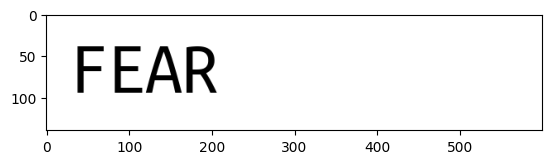

In [39]:
imgs, lbls = next(iter(train_ds))
plt.imshow(imgs[5].numpy().astype("uint8"), cmap="gray")
print(lbls[9].numpy())
imgs[5].numpy().astype("uint8")[100, 100]

In [43]:
# creating a CNN model
cnn_model = ks.models.Sequential([
    ks.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(140, 600, 1), padding='same'),
    ks.layers.MaxPooling2D((2, 2), strides=2, padding='valid'),
    ks.layers.Conv2D(64, (7, 7), activation='relu', padding='same'),
    ks.layers.MaxPooling2D((2, 2), strides=2, padding='valid'),
    ks.layers.Conv2D(64, (13, 13), activation='relu', padding='same'),
    ks.layers.MaxPooling2D((2, 2), strides=2, padding='valid'),
    # ks.layers.Conv2D(128, (3, 3), activation='relu'),
    # ks.layers.MaxPooling2D((2, 2), strides=2, padding='valid'),
    ks.layers.Flatten(),
    ks.layers.Dense(200, activation='relu'),
    ks.layers.Dense(104, activation='softmax')
])

cnn_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 140, 600, 32)      320       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 70, 300, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 70, 300, 64)       100416    
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 35, 150, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 35, 150, 64)       692288    
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 17, 75, 64)       

In [44]:
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [45]:
training_hist = cnn_model.fit(x=train_ds, validation_data=val_ds, epochs=10, verbose=2)

Epoch 1/10


94/94 - 256s - loss: 33.4562 - accuracy: 0.0053 - val_loss: 4.6464 - val_accuracy: 0.0000e+00 - 256s/epoch - 3s/step
Epoch 2/10


KeyboardInterrupt: 